In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
import joblib

import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
data_normal_1 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_normal_1.csv')
data_normal_2 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_normal_2.csv')
data_normal_3 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_normal_3.csv')
data_normal_4 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_normal_4.csv')

data_normal_5 = pd.read_csv('dataset/timeseries/old/dataset_udp_timeseries_normal_1.csv')
data_normal_6 = pd.read_csv('dataset/timeseries/old/dataset_udp_timeseries_normal_2.csv')
data_normal_7 = pd.read_csv('dataset/timeseries/old/dataset_udp_timeseries_normal_3.csv')

data_attack_1 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_attack_1.csv')
data_attack_2 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_attack_2.csv')
data_attack_3 = pd.read_csv('dataset/timeseries/udp_dataset_timeseries_attack_3.csv')

data_attack_4 = pd.read_csv('dataset/timeseries/old/dataset_udp_timeseries_attack_1.csv')
data_attack_5 = pd.read_csv('dataset/timeseries/old/dataset_udp_timeseries_attack_2.csv')

In [3]:
data_normal_1.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']
data_normal_2.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']
data_normal_3.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']
data_normal_4.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']

data_normal_5.columns = ['timestamp', 'port_src', 'port_dest',
       'len', 'chksum', 'payload_len', 'label']
data_normal_6.columns = ['timestamp', 'port_src', 'port_dest',
       'len', 'chksum', 'payload_len', 'label']
data_normal_7.columns = ['timestamp', 'port_src', 'port_dest',
       'len', 'chksum', 'payload_len', 'label']

data_attack_1.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']
data_attack_2.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']
data_attack_3.columns = ['port_src', 'len', 'chksum', 'payload_len', 'label']

data_attack_4.columns = ['timestamp', 'port_src', 'port_dest',
       'len', 'chksum', 'payload_len', 'label']
data_attack_5.columns = ['timestamp', 'port_src', 'port_dest',
       'len', 'chksum', 'payload_len', 'label']

In [4]:
data_normal_5 = data_normal_5.drop(['timestamp', 'port_dest'],axis=1)
data_normal_6 = data_normal_6.drop(['timestamp', 'port_dest'],axis=1)
data_normal_7 = data_normal_7.drop(['timestamp', 'port_dest'],axis=1)

data_attack_4 = data_attack_4.drop(['timestamp', 'port_dest'],axis=1)
data_attack_5 = data_attack_5.drop(['timestamp', 'port_dest'],axis=1)

In [5]:
features = ['port_src', 'len', 'chksum', 'payload_len']

In [6]:
X_normal_1 = data_normal_1[features].values
X_normal_2 = data_normal_2[features].values
X_normal_3 = data_normal_3[features].values
X_normal_4 = data_normal_4[features].values
X_normal_5 = data_normal_5[features].values
X_normal_6 = data_normal_6[features].values
X_normal_7 = data_normal_7[features].values

X_attack_1 = data_attack_1[features].values
X_attack_2 = data_attack_2[features].values
X_attack_3 = data_attack_3[features].values
X_attack_4 = data_attack_4[features].values
X_attack_5 = data_attack_5[features].values

Y_normal_1 = data_normal_1['label']
Y_normal_2 = data_normal_2['label']
Y_normal_3 = data_normal_3['label']
Y_normal_4 = data_normal_4['label']
Y_normal_5 = data_normal_5['label']
Y_normal_6 = data_normal_6['label']
Y_normal_7 = data_normal_7['label']

Y_attack_1 = data_attack_1['label']
Y_attack_2 = data_attack_2['label']
Y_attack_3 = data_attack_3['label']
Y_attack_4 = data_attack_4['label']
Y_attack_5 = data_attack_5['label']

X=np.concatenate((X_normal_1,X_normal_2,X_normal_3,X_normal_4,X_normal_5,X_normal_6,X_normal_7,X_attack_1,X_attack_2,X_attack_3,X_attack_4,X_attack_5))
Y=np.concatenate((Y_normal_1,Y_normal_2,Y_normal_3,Y_normal_4,Y_normal_5,Y_normal_6,Y_normal_7,Y_attack_1,Y_attack_2,Y_attack_3,Y_attack_4,Y_attack_5))

In [7]:
data_counter = Counter(Y)
print(data_counter)

Counter({1: 113620, 0: 31688})


In [8]:
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, Y = pipeline.fit_resample(X, Y)

In [9]:
data_counter = Counter(Y)
print(data_counter)

Counter({0: 113620, 1: 113620})


In [10]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [11]:
print(np.shape(X))
print(np.shape(Y))

(227240, 4)
(227240,)


In [12]:
features = len(X[0])
samples = X.shape[0]
train_len = 50
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

In [13]:
for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [14]:
print(I.shape)

(227190, 50, 4)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[50:], test_size = 0.2, stratify=Y[50:], random_state = 0)

In [16]:
def create_baseline():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [17]:
model = create_baseline()

In [18]:
checkpoint = ModelCheckpoint("LSTMmodel.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [19]:
history = model.fit(X_train, Y_train, epochs = 20,validation_split=0.2, verbose = 1, callbacks=[checkpoint,early])

Epoch 1/20
4544/4544 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9953
Epoch 00001: val_loss improved from inf to 0.03909, saving model to LSTMmodel.h5
4544/4544 [==============================] - 57s 12ms/step - loss: 0.0784 - accuracy: 0.9953 - val_loss: 0.0391 - val_accuracy: 0.9985
Epoch 2/20
4543/4544 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9990
Epoch 00002: val_loss improved from 0.03909 to 0.02280, saving model to LSTMmodel.h5
4544/4544 [==============================] - 54s 12ms/step - loss: 0.0312 - accuracy: 0.9990 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 3/20
4543/4544 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9991
Epoch 00003: val_loss did not improve from 0.02280
4544/4544 [==============================] - 59s 13ms/step - loss: 0.0310 - accuracy: 0.9991 - val_loss: 0.0239 - val_accuracy: 0.9996
Epoch 4/20
4540/4544 [============================>.] - ETA: 0s - loss: 0.0339 - acc

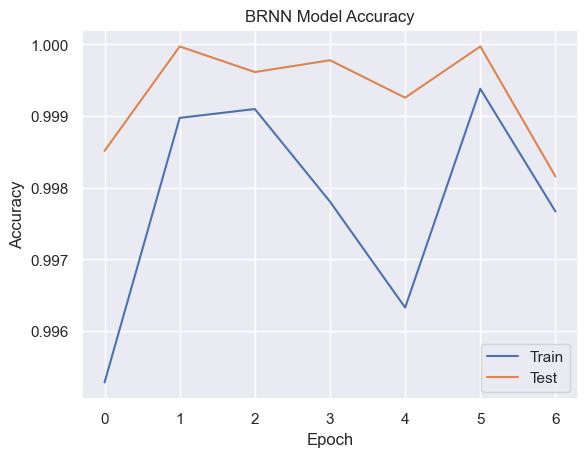

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN 500 Model Accuracy.png')
plt.show()

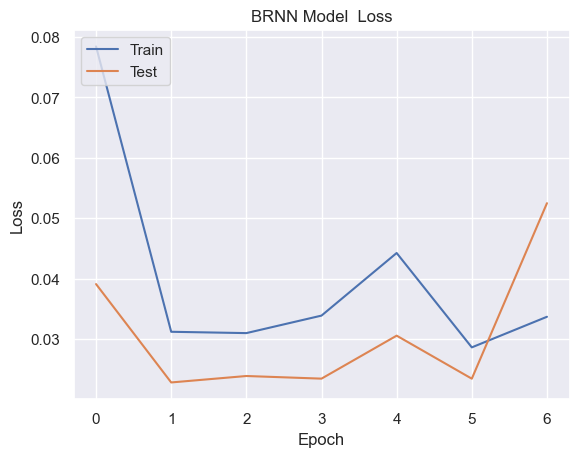

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN 50 Model Loss.png')
plt.show()

In [22]:
predict = model.predict(X_test, verbose=1)

1420/1420 [==============================] - 6s 4ms/step


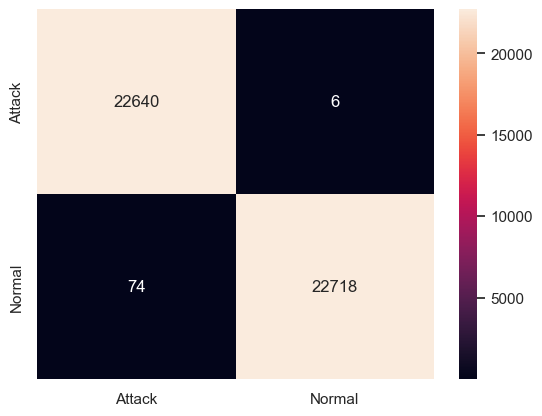

In [23]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [24]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_BRNN_50.png', dpi=400)

In [25]:
model.save('brnn_model_50_step.h5')
joblib.dump(scalar, 'scaler_50.save')

['scaler_50.save']

In [26]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.82%


In [27]:
print(classification_report(Y_testn,predictn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22714
           1       1.00      1.00      1.00     22724

    accuracy                           1.00     45438
   macro avg       1.00      1.00      1.00     45438
weighted avg       1.00      1.00      1.00     45438



In [28]:
lr_auc = roc_auc_score(Y_testn, predictn)
print('SVM: ROC AUC=%.3f' % (lr_auc))

SVM: ROC AUC=0.998


In [29]:
time_start = time.perf_counter()
predict = model.predict(I[:50], verbose=1)
print(f"Time elapse for prediction : {time.perf_counter() - time_start}")
print(predict)

2/2 [==============================] - 0s 6ms/step
Time elapse for prediction : 0.044568599999990965
[[0.01272713]
 [0.01272713]
 [0.01272713]
 [0.01272713]
 [0.01274971]
 [0.01278098]
 [0.01278687]
 [0.0127899 ]
 [0.0128189 ]
 [0.01282242]
 [0.01282687]
 [0.01285952]
 [0.01289625]
 [0.01293953]
 [0.01294915]
 [0.0129911 ]
 [0.01300034]
 [0.01304451]
 [0.01304972]
 [0.01305283]
 [0.01305494]
 [0.01309565]
 [0.01309734]
 [0.01313769]
 [0.013186  ]
 [0.01318549]
 [0.01322949]
 [0.0132281 ]
 [0.01327098]
 [0.01325706]
 [0.01330051]
 [0.01329277]
 [0.01333069]
 [0.01331409]
 [0.013291  ]
 [0.01326415]
 [0.0132352 ]
 [0.01325789]
 [0.01328892]
 [0.01326649]
 [0.01323862]
 [0.01326234]
 [0.01323719]
 [0.01326263]
 [0.01329486]
 [0.01327214]
 [0.0132445 ]
 [0.01326963]
 [0.01324622]
 [0.01321988]]


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              35328     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 51,969
Trainable params: 51,969
Non-trainable params: 0
_________________________________________________________________
